# Análisis de cluster: censo y votos Chile

## Preparación de los datos

El análisis de cluster se realiza con un dataset creado desde el Censo 2017 y los resultados electorales de 1° Vuelta de 2021. Para cada comuna se presentan los porcentajes o promedios de cada variable, que alimentarán el proceso de modelado de cluster con Kmeans

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [ ]:
base = pd.read_csv('C:/Users/benja/OneDrive - Instituto Nacional de Estadisticas/PAECIS/TIF/Salidas C17/union_censo_votos2021.csv')

In [ ]:
base.head()

,Unnamed: 0,COMUNA,P09,esc_rec,urban,hom,Comuna,Artés,Boric,Kast,MEO,Parisi,Provoste,Sichel,Código Comuna 2018
0,0,1101,43.077209,12.206611,0.986897,0.489614,IQUIQUE,0.013232,0.210974,0.326920,0.063546,0.214241,0.081862,0.089224,1101
1,1,1107,39.236018,10.566225,0.965618,0.494028,ALTO HOSPICIO,0.010811,0.130848,0.240895,0.070377,0.406314,0.090932,0.049823,1107
2,2,1401,41.179667,10.756886,0.596056,0.599474,POZO ALMONTE,0.011417,0.107087,0.248031,0.054331,0.403346,0.130709,0.045079,1401
3,3,1402,47.606522,8.372503,0.000000,0.538043,CAMIÑA,0.003452,0.069045,0.441887,0.018412,0.377445,0.054085,0.035673,1402
4,4,1403,43.290368,8.653282,0.000000,0.585694,COLCHANE,0.004415,0.018764,0.462472,0.005519,0.477925,0.019868,0.011038,1403


In [ ]:
base = base.drop(columns=['Unnamed: 0', 'Código Comuna 2018', 'Comuna'])

In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   COMUNA    346 non-null    int64  
 1   P09       346 non-null    float64
 2   esc_rec   346 non-null    float64
 3   urban     346 non-null    float64
 4   hom       346 non-null    float64
 5   Artés     346 non-null    float64
 6   Boric     346 non-null    float64
 7   Kast      346 non-null    float64
 8   MEO       346 non-null    float64
 9   Parisi    346 non-null    float64
 10  Provoste  346 non-null    float64
 11  Sichel    346 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 32.6 KB


In [ ]:
base.dtypes

COMUNA        int64
P09         float64
esc_rec     float64
urban       float64
hom         float64
Artés       float64
Boric       float64
Kast        float64
MEO         float64
Parisi      float64
Provoste    float64
Sichel      float64
dtype: object

In [ ]:
sin_com = base.drop(columns=['COMUNA'])

bas_arr = np.array(sin_com)

## Modelo de cluster no jerárquico con K-means

c:\Users\benja\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\benja\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\benja\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\benja\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

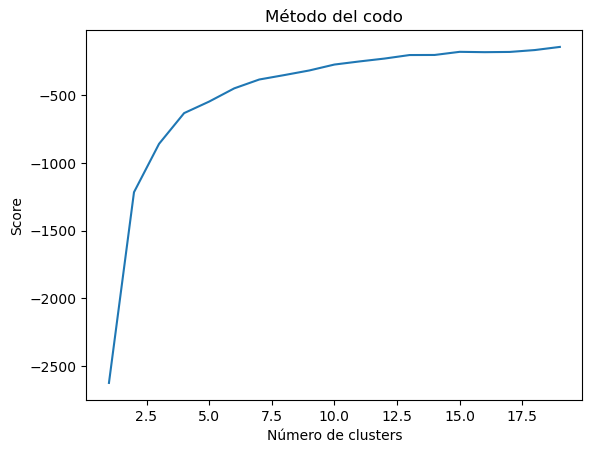

In [ ]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(bas_arr).score(bas_arr) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Número de clusters')
plt.ylabel('Score')
plt.title('Método del codo')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=8).fit(bas_arr)
centroids = kmeans.cluster_centers_
print(centroids)

[[4.82738772e+01 8.84523478e+00 4.56171531e-01 5.01201543e-01
  9.66687705e-03 1.62902937e-01 3.59675740e-01 5.35314496e-02
  1.29230965e-01 1.75933697e-01 1.09058333e-01]
 [4.41818522e+01 1.12849462e+01 8.28487892e-01 5.02130034e-01
  1.39411736e-02 2.60808473e-01 2.68207886e-01 8.01782590e-02
  1.42402422e-01 1.16962751e-01 1.17499035e-01]
 [3.87261478e+01 1.25796581e+01 5.18122910e-01 6.93279401e-01
  9.96999712e-03 1.83990692e-01 3.59895887e-01 6.44575885e-02
  2.07255420e-01 1.08352307e-01 6.60781088e-02]
 [4.66882110e+01 9.30498888e+00 5.30862378e-01 5.00474575e-01
  1.07002449e-02 1.83093020e-01 3.27230459e-01 6.34296751e-02
  1.47182134e-01 1.53850364e-01 1.14514103e-01]
 [4.54661748e+01 1.00916134e+01 7.58744095e-01 4.91616856e-01
  1.34424127e-02 2.25828202e-01 2.70602826e-01 7.74721721e-02
  1.65636337e-01 1.44749421e-01 1.02268629e-01]
 [5.04468227e+01 8.77136723e+00 3.40375075e-01 5.05874402e-01
  1.11541645e-02 2.00255261e-01 2.88824706e-01 5.75870597e-02
  1.04969254e-01

c:\Users\benja\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [ ]:
# Calculando los clusters
labels = kmeans.predict(bas_arr)
print(labels)

[1 2 7 0 7 3 7 7 7 2 1 7 7 7 4 7 7 1 7 4 1 4 0 3 4 1 1 3 0 3 4 3 5 3 4 4 5
 3 0 5 1 4 6 1 3 4 6 7 1 4 4 4 3 3 1 0 3 4 4 4 1 4 4 5 0 5 5 3 1 3 4 4 3 4
 6 4 3 6 1 4 3 3 4 1 3 1 3 4 4 3 3 3 4 4 3 3 5 0 0 5 5 4 3 3 0 3 3 0 3 5 3
 1 4 5 3 7 3 0 3 3 3 0 0 0 1 0 0 4 3 4 3 3 5 4 3 3 3 0 3 3 3 1 1 1 0 4 4 4
 1 3 1 3 1 4 4 3 0 4 4 4 1 0 4 3 3 4 3 5 0 0 3 0 0 7 1 0 0 3 3 0 0 4 0 0 3
 1 3 3 1 0 0 0 4 4 3 4 3 0 3 3 0 0 0 3 0 3 7 3 0 0 4 0 4 0 1 4 3 4 0 4 0 3
 7 0 0 4 3 3 3 0 5 0 4 4 3 0 1 0 1 7 7 1 7 7 3 0 1 3 7 1 2 2 7 1 7 4 2 2 1
 4 4 4 1 1 7 6 1 4 7 6 6 6 4 4 6 1 6 4 1 6 7 7 1 1 1 4 6 4 6 7 1 1 7 7 1 7
 7 1 1 4 4 4 4 3 1 1 1 7 1 1 0 3 3 3 4 3 3 3 3 0 0 1 0 2 3 1 3 1 0 3 3 0 0
 3 0 5 0 5 5 5 0 3 4 5 0 0]


In [ ]:
# Genero un dataframe con la cantidad de individuos por cluster
cantidad_por_cluster =  pd.DataFrame()
cantidad_por_cluster['COMUNA']=base['COMUNA'].values
cantidad_por_cluster['label'] = kmeans.labels_

cantidad_por_cluster
#diferencia kmeans.labels_ y kmeans.predict() -> predict se puede usar para nuevos datos, labels son los datos ajustados a entrenamiento
#cantidad_por_cluster['label'] = kmeans.labels_

#agrupados = cantidad_por_cluster.groupby(['AGLOMERADO', 'label']).size().reset_index(name='count')

,COMUNA,label
0,1101,1
1,1107,2
2,1401,7
3,1402,0
4,1403,7
...,...,...
341,16301,3
342,16302,4
343,16303,5
344,16304,0


In [ ]:
clusters = base

clusters['cluster'] = kmeans.labels_

clusters

,COMUNA,P09,esc_rec,urban,hom,Artés,Boric,Kast,MEO,Parisi,Provoste,Sichel,cluster
0,1101,43.077209,12.206611,0.986897,0.489614,0.013232,0.210974,0.326920,0.063546,0.214241,0.081862,0.089224,1
1,1107,39.236018,10.566225,0.965618,0.494028,0.010811,0.130848,0.240895,0.070377,0.406314,0.090932,0.049823,2
2,1401,41.179667,10.756886,0.596056,0.599474,0.011417,0.107087,0.248031,0.054331,0.403346,0.130709,0.045079,7
3,1402,47.606522,8.372503,0.000000,0.538043,0.003452,0.069045,0.441887,0.018412,0.377445,0.054085,0.035673,0
4,1403,43.290368,8.653282,0.000000,0.585694,0.004415,0.018764,0.462472,0.005519,0.477925,0.019868,0.011038,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,16301,47.106970,9.480996,0.619861,0.470931,0.008276,0.161209,0.406827,0.048476,0.120650,0.130674,0.123888,3
342,16302,45.255440,8.825410,0.329557,0.496307,0.009094,0.107035,0.464618,0.048500,0.104212,0.139020,0.127522,4
343,16303,50.248132,8.133293,0.103207,0.500977,0.007564,0.114761,0.432246,0.065053,0.111952,0.136590,0.131835,5
344,16304,48.069482,8.798042,0.395328,0.507937,0.006111,0.171977,0.351375,0.042340,0.122654,0.171104,0.134439,0


In [ ]:
clusters.groupby('cluster').agg('mean')

,COMUNA,P09,esc_rec,urban,hom,Artés,Boric,Kast,MEO,Parisi,Provoste,Sichel
cluster,,,,,,,,,,,,
0,9645.333333,48.273877,8.845235,0.456172,0.501202,0.009667,0.162903,0.359676,0.053531,0.129231,0.175934,0.109058
1,9775.107143,44.181852,11.284946,0.828488,0.502130,0.013941,0.260808,0.268208,0.080178,0.142402,0.116963,0.117499
2,9759.571429,38.726148,12.579658,0.518123,0.693279,0.009970,0.183991,0.359896,0.064458,0.207255,0.108352,0.066078
3,8548.082353,46.688211,9.304989,0.530862,0.500475,0.010700,0.183093,0.327230,0.063430,0.147182,0.153850,0.114514
4,8410.200000,45.466175,10.091613,0.758744,0.491617,0.013442,0.225828,0.270603,0.077472,0.165636,0.144749,0.102269
5,8878.315789,50.446823,8.771367,0.340375,0.505874,0.011154,0.200255,0.288825,0.057587,0.104969,0.196716,0.140494
6,10760.846154,45.688964,13.447583,0.990665,0.458838,0.011907,0.260864,0.332605,0.049556,0.052832,0.089183,0.203053
7,8450.000000,42.135022,10.858471,0.654260,0.567295,0.014268,0.228319,0.255548,0.079866,0.213582,0.117119,0.091297


In [ ]:
# más cercanos

closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, bas_arr)
closest

array([117,  26, 250, 184,  82,  36,  42, 115], dtype=int64)

In [ ]:
comunas = base['COMUNA']
for row in closest:
    print(comunas[row])

7107
4102
12201
9111
6105
4302
5103
7105


In [ ]:
ejemplos = base.loc[closest]

In [ ]:
ejemplos

,COMUNA,P09,esc_rec,urban,hom,Artés,Boric,Kast,MEO,Parisi,Provoste,Sichel,cluster
117,7107,48.298657,8.655023,0.400344,0.514839,0.005011,0.132387,0.352057,0.056170,0.121946,0.195448,0.136981,0
26,4102,44.083622,11.355148,0.941953,0.472825,0.014612,0.263161,0.220129,0.080521,0.207726,0.109995,0.103856,1
250,12201,38.979852,12.137602,0.886501,0.617864,0.011534,0.217993,0.485582,0.032295,0.094579,0.085352,0.072664,2
184,9111,46.680390,9.439736,0.562633,0.480999,0.013463,0.166099,0.355268,0.076469,0.124575,0.174041,0.090084,3
82,6105,45.445213,10.212166,0.779431,0.493273,0.010674,0.263170,0.226673,0.087226,0.171927,0.115804,0.124527,4
36,4302,50.504714,8.772146,0.429286,0.496825,0.013511,0.244404,0.178463,0.042549,0.188949,0.256100,0.076023,5
42,5103,45.044793,12.759348,0.935872,0.472918,0.008956,0.205736,0.377466,0.050466,0.085845,0.081851,0.189681,6
115,7105,41.687914,10.834363,0.762310,0.476654,0.007830,0.176343,0.284715,0.080633,0.194835,0.127030,0.128613,7


In [ ]:
clusters.to_csv("C:/Users/benja/OneDrive - Instituto Nacional de Estadisticas/PAECIS/TIF/kmeans_8.csv")

In [ ]:
ejemplos.to_csv("C:/Users/benja/OneDrive - Instituto Nacional de Estadisticas/PAECIS/TIF/kmeans.csv")

## Mapeando los resultados

In [ ]:
%pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install shapely

Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install geoplot

     ---------------------------------------- 0.0/56.0 kB ? eta -:--:--
     ------- -------------------------------- 10.2/56.0 kB ? eta -:--:--
     -------------------- ----------------- 30.7/56.0 kB 640.0 kB/s eta 0:00:01
     -------------------- ----------------- 30.7/56.0 kB 640.0 kB/s eta 0:00:01
     -------------------------------------- 56.0/56.0 kB 324.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.9 MB 1.7 MB/s eta 0:00:07
   ---------------------------------------- 0.1/10.9 MB 1.3 MB/s eta 0:00:09
   ---------------------------------------- 0.1/10.9 MB 819.2 kB/s eta 0:00:14
    --------------------------------------- 0.2/10.9 MB 1.1 MB/s eta 0:00:10
    --------------------------------------- 0.2/10.9 MB 1.1 MB/s eta 0:00:10
    --------------------------------------- 0.2/10.9 MB 901.1 kB/s eta 0:00:12
   - -------------------------------------- 0.4/10.9 MB 1.1 MB/s eta 0:00:10
  

In [ ]:
import shapely
import geopandas as gpd
import geoplot.crs as gcrs
import geoplot as gplt

In [ ]:
shape_comunas = gpd.read_file('C:/Users/benja/OneDrive - Instituto Nacional de Estadisticas/PAECIS/TIF/comunas_2017/Comuna_Densid_Superficie.shp')

In [ ]:
shape_comunas

,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,NOM_COMUNA,T_HOM_R,T_MUJ_R,T_POB_R,T_HOM_U,...,T_MUJ,T_POB,T_VIV_U,T_VIV_R,T_VIV,SUPERFICIE,Densidad_,SHAPE_Leng,SHAPE_Area,geometry
0,12,REGIÓN DE MAGALLANES Y DE LA ANTÁRTICA CHILENA,121,MAGALLANES,12102,LAGUNA BLANCA,191.0,83.0,274.0,0.0,...,83.0,274.0,0.0,285.0,285.0,3496.802490,0.078357,5.097627e+05,9.341689e+09,"POLYGON ((-7889811.258 -6809542.176, -7889367...."
1,2,REGIÓN DE ANTOFAGASTA,22,EL LOA,2202,OLLAGÜE,207.0,114.0,321.0,0.0,...,114.0,321.0,0.0,439.0,439.0,2920.857910,0.109899,3.089977e+05,3.388897e+09,"POLYGON ((-7615650.203 -2384082.354, -7602564...."
2,12,REGIÓN DE MAGALLANES Y DE LA ANTÁRTICA CHILENA,123,TIERRA DEL FUEGO,12303,TIMAUKEL,343.0,62.0,405.0,0.0,...,62.0,405.0,0.0,214.0,214.0,11018.557617,0.036756,2.862313e+06,3.204456e+10,"MULTIPOLYGON (((-7746791.670 -7100956.705, -77..."
3,11,REGIÓN DE AYSÉN DEL GENERAL CARLOS IBÁÑEZ DEL ...,113,CAPITÁN PRAT,11303,TORTEL,285.0,238.0,523.0,0.0,...,238.0,523.0,0.0,320.0,320.0,20106.427734,0.026012,1.296318e+07,4.492944e+10,"MULTIPOLYGON (((-8238701.006 -5937216.202, -82..."
4,12,REGIÓN DE MAGALLANES Y DE LA ANTÁRTICA CHILENA,121,MAGALLANES,12103,RÍO VERDE,522.0,95.0,617.0,0.0,...,95.0,617.0,0.0,231.0,231.0,9158.579102,0.067369,6.348059e+06,2.505578e+10,"MULTIPOLYGON (((-7956410.827 -6918659.631, -79..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,2,REGIÓN DE ANTOFAGASTA,21,ANTOFAGASTA,2101,ANTOFAGASTA,6906.0,863.0,7769.0,174940.0,...,180027.0,361873.0,111752.0,699.0,112451.0,30690.392578,11.791084,1.236882e+06,3.712744e+10,"MULTIPOLYGON (((-7788991.378 -2671893.270, -77..."
341,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13110,LA FLORIDA,67.0,50.0,117.0,175626.0,...,191223.0,366916.0,119991.0,44.0,120035.0,70.822655,5180.771484,5.887762e+04,1.023265e+08,"POLYGON ((-7843016.203 -3961230.069, -7842623...."
342,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13101,SANTIAGO,0.0,0.0,0.0,206678.0,...,197817.0,404495.0,193628.0,0.0,193628.0,23.135237,17483.935547,2.896417e+04,3.336699e+07,"POLYGON ((-7865798.101 -3952527.040, -7864907...."
343,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13119,MAIPÚ,1952.0,1481.0,3433.0,248840.0,...,270835.0,521627.0,160389.0,965.0,161354.0,137.676132,3788.797607,7.318179e+04,1.983892e+08,"POLYGON ((-7878700.682 -3956276.456, -7877612...."


<Axes: >

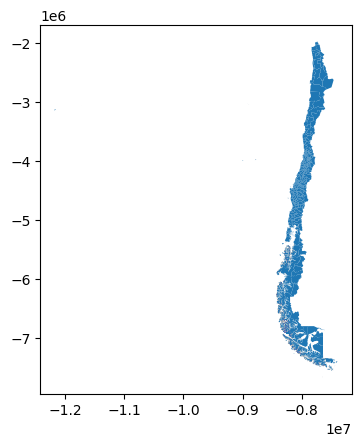

In [ ]:
shape_comunas.plot()

In [ ]:
shape_comunas.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   REGION      345 non-null    object  
 1   NOM_REGION  345 non-null    object  
 2   PROVINCIA   345 non-null    object  
 3   NOM_PROVIN  345 non-null    object  
 4   COMUNA      345 non-null    object  
 5   NOM_COMUNA  345 non-null    object  
 6   T_HOM_R     345 non-null    float64 
 7   T_MUJ_R     345 non-null    float64 
 8   T_POB_R     345 non-null    float64 
 9   T_HOM_U     345 non-null    float64 
 10  T_MUJ_U     345 non-null    float64 
 11  T_POB_U     345 non-null    float64 
 12  T_HOM       345 non-null    float64 
 13  T_MUJ       345 non-null    float64 
 14  T_POB       345 non-null    float64 
 15  T_VIV_U     345 non-null    float64 
 16  T_VIV_R     345 non-null    float64 
 17  T_VIV       345 non-null    float64 
 18  SUPERFICIE  345 non-null    float64 
 19  

In [ ]:
shape_comunas['COMUNA'] = pd.to_numeric(shape_comunas['COMUNA'])


union_shp = pd.merge(shape_comunas, clusters, how='left', left_on='COMUNA', right_on='COMUNA')

In [ ]:
union_shp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 345 entries, 0 to 344
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   REGION      345 non-null    object  
 1   NOM_REGION  345 non-null    object  
 2   PROVINCIA   345 non-null    object  
 3   NOM_PROVIN  345 non-null    object  
 4   COMUNA      345 non-null    int64   
 5   NOM_COMUNA  345 non-null    object  
 6   T_HOM_R     345 non-null    float64 
 7   T_MUJ_R     345 non-null    float64 
 8   T_POB_R     345 non-null    float64 
 9   T_HOM_U     345 non-null    float64 
 10  T_MUJ_U     345 non-null    float64 
 11  T_POB_U     345 non-null    float64 
 12  T_HOM       345 non-null    float64 
 13  T_MUJ       345 non-null    float64 
 14  T_POB       345 non-null    float64 
 15  T_VIV_U     345 non-null    float64 
 16  T_VIV_R     345 non-null    float64 
 17  T_VIV       345 non-null    float64 
 18  SUPERFICIE  345 non-null    float64 
 19  

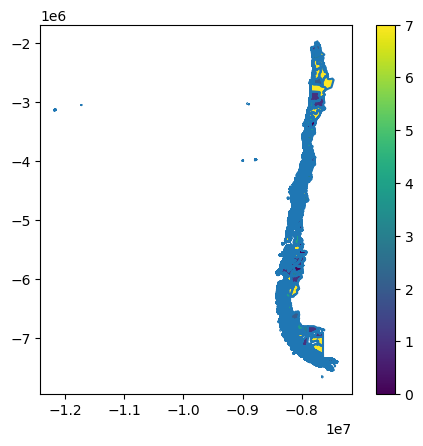

In [ ]:
fig, ax = plt.subplots()

union_shp.boundary.plot(ax=ax)
union_shp.plot(column = 'cluster', ax = ax, legend=True,  )

plt.show()

## Resultados por variable y cluster

In [ ]:

ESC = clusters['esc_rec'].values
EDAD = clusters['P09'].values

CLUST = clusters['cluster'].values
CLUST_ = np.unique(CLUST)

COLORS = ['#240E31FF', '#CB6BCEFF', '#468892FF', '#74F3D3FF', '#751C6DFF', '#FDC067FF', '#AC9ECEFF', '#6EC5ABFF']

#ax.scatter(x=clusters['esc_rec'], y=clusters['P09'], )

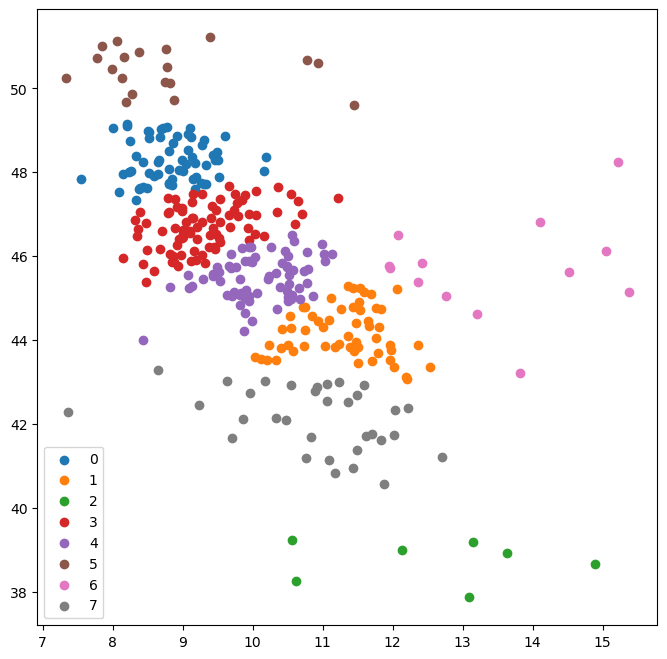

In [ ]:
fig, ax = plt.subplots(figsize = (8,8))

for clust, color in zip(CLUST_, COLORS):
    idxs = np.where(CLUST == clust)
    ax.scatter(ESC[idxs], EDAD[idxs], label = clust)

ax.set_title('Nivel educativo y edad (promedio por comuna)')
ax.set_xlabel('Años de escolaridad')
ax.set_ylabel('Edad')

ax.legend()
plt.show()

In [ ]:
BORIC = clusters['Boric'].values
KAST = clusters['Kast'].values

CLUST = clusters['cluster'].values
CLUST_ = np.unique(CLUST)

COLORS = ['#240E31FF', '#CB6BCEFF', '#468892FF', '#74F3D3FF', '#751C6DFF', '#FDC067FF', '#AC9ECEFF', '#6EC5ABFF']


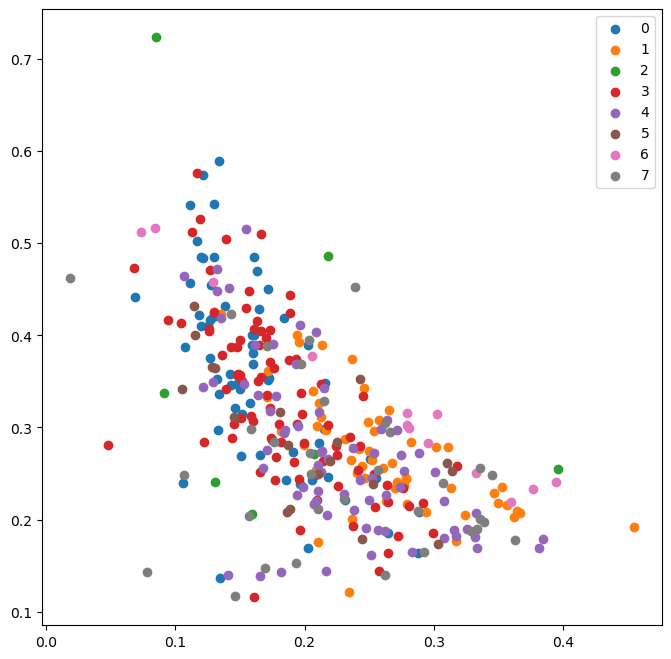

In [ ]:
fig, ax = plt.subplots(figsize = (8,8))

for clust, color in zip(CLUST_, COLORS):
    idxs = np.where(CLUST == clust)
    ax.scatter(BORIC[idxs], KAST[idxs], label = clust)

ax.legend()
plt.show()

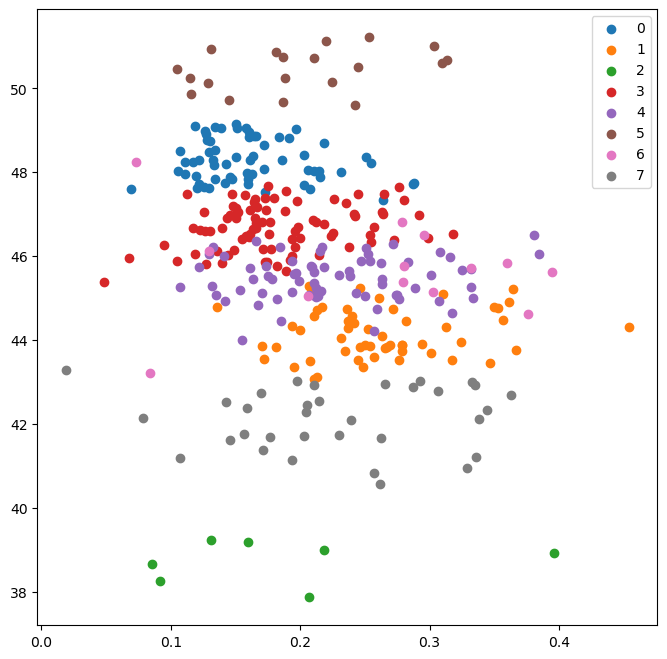

In [ ]:
fig, ax = plt.subplots(figsize = (8,8))

for clust, color in zip(CLUST_, COLORS):
    idxs = np.where(CLUST == clust)
    ax.scatter(BORIC[idxs], EDAD[idxs], label = clust)

ax.legend()
plt.show()

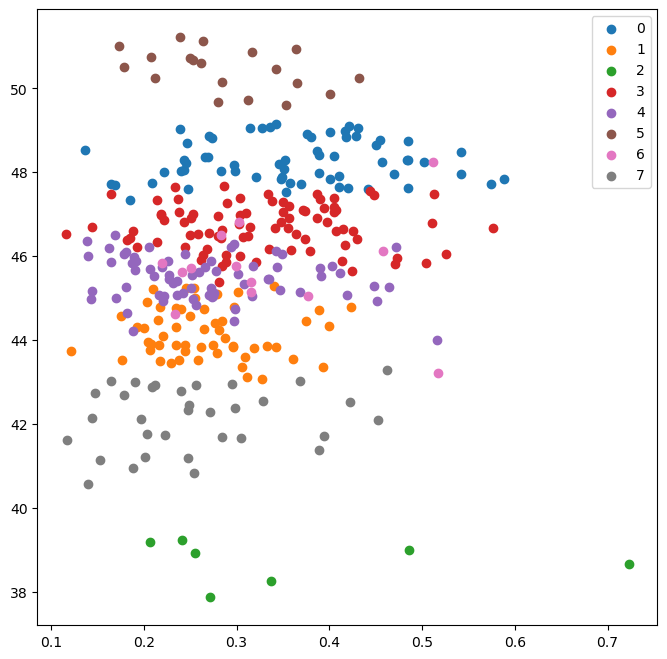

In [ ]:
fig, ax = plt.subplots(figsize = (8,8))

for clust, color in zip(CLUST_, COLORS):
    idxs = np.where(CLUST == clust)
    ax.scatter(KAST[idxs], EDAD[idxs], label = clust)

ax.legend()
plt.show()

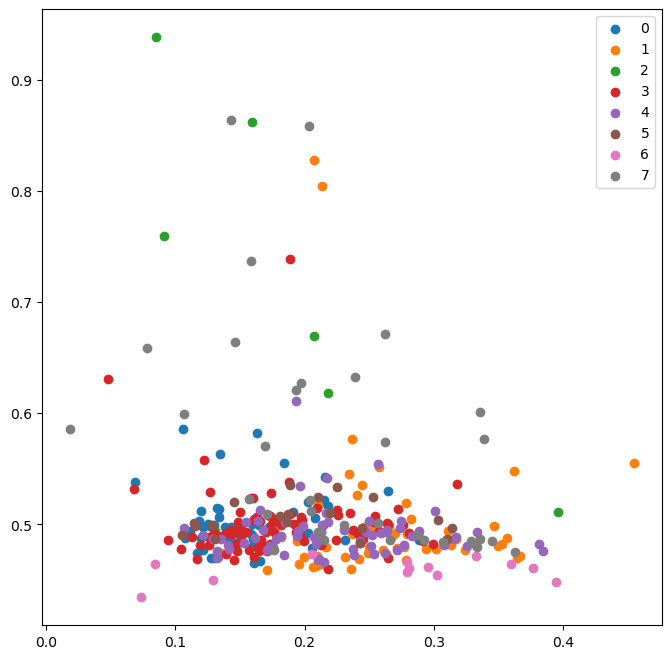

In [ ]:
HOM = clusters['hom'].values

fig, ax = plt.subplots(figsize = (8,8))

for clust, color in zip(CLUST_, COLORS):
    idxs = np.where(CLUST == clust)
    ax.scatter(BORIC[idxs], HOM[idxs], label = clust)

ax.legend()
plt.show()

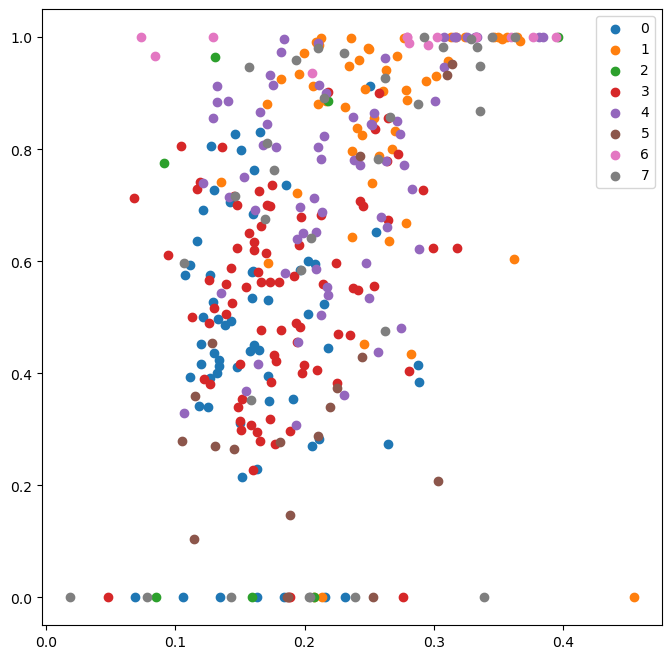

In [ ]:
URBAN = clusters['urban'].values

fig, ax = plt.subplots(figsize = (8,8))

for clust, color in zip(CLUST_, COLORS):
    idxs = np.where(CLUST == clust)
    ax.scatter(BORIC[idxs], URBAN[idxs], label = clust)

ax.legend()
plt.show()

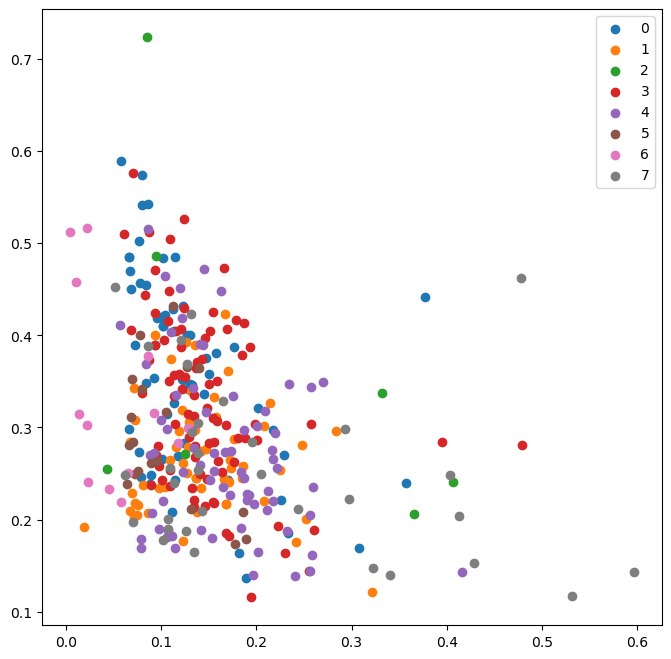

In [ ]:
PARISI = clusters['Parisi'].values

fig, ax = plt.subplots(figsize = (8,8))

for clust, color in zip(CLUST_, COLORS):
    idxs = np.where(CLUST == clust)
    ax.scatter(PARISI[idxs], KAST[idxs], label = clust)

ax.legend()
plt.show()